**IMPORTANDO AS BIBLIOTECAS**


In [ ]:
import pandas as pd
import seaborn as srn
import statistics as sts
import numpy as np
import matplotlib.pyplot as plt

**IMPORTANDO O DATASET**

In [ ]:
dataset = pd.read_csv("Churn.csv", sep=	";")
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


**TAMANHO DO DATASET**

In [ ]:
dataset.shape

(999, 12)

**ATRIBUINDO O NOME AS COLUNAS**

In [ ]:
dataset.columns = ["Id", "Score", "Estado", "Genero", "Idade", "Patrimonio", "Saldo", "Produtos", "TemCartCredito", "Ativo", "Salario", "Saiu"]
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


**EXPLORAR DADOS CATEGORICOS**


In [ ]:
#estado
agrupado = dataset.groupby(["Estado"]).size()
agrupado

,0
Estado,
PR,257
RP,1
RS,478
SC,258
SP,4
TD,1


**GRÁFICO DE BARRAS**

<Axes: xlabel='Genero'>

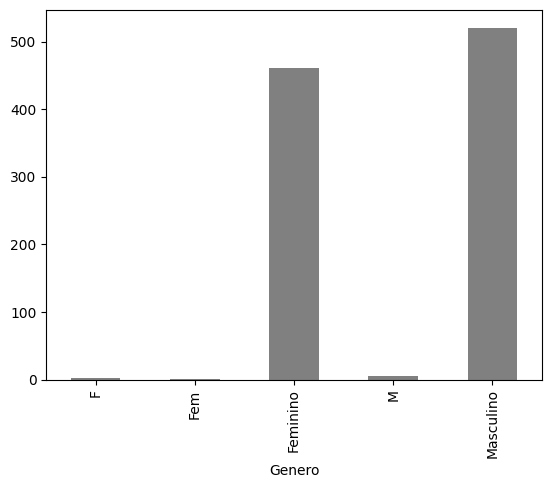

In [ ]:
agrupado.plot.bar(color="gray")

In [ ]:
#genero
agrupado = dataset.groupby(["Genero"]).size()
agrupado

,0
Genero,
F,2
Fem,1
Feminino,461
M,6
Masculino,521


<Axes: xlabel='Genero'>

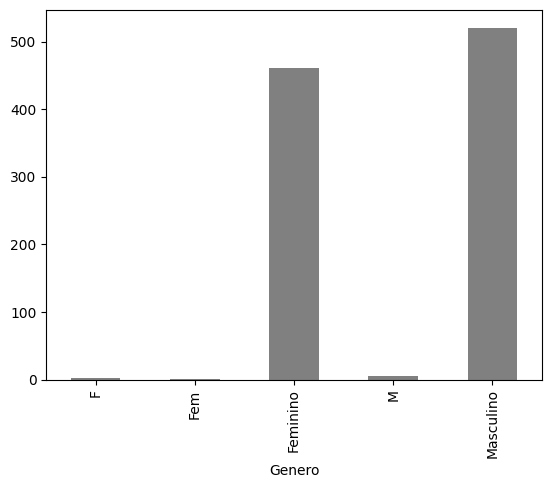

In [ ]:
agrupado.plot.bar(color="gray")

In [ ]:
#explorando colunas númericas
#score (potencial de crédito do cliente )
dataset["Score"].describe()

,Score
count,999.000000
mean,648.621622
std,98.264219
min,376.000000
25%,580.000000
50%,653.000000
75%,721.000000
max,850.000000


Text(0.5, 1.0, 'Score')

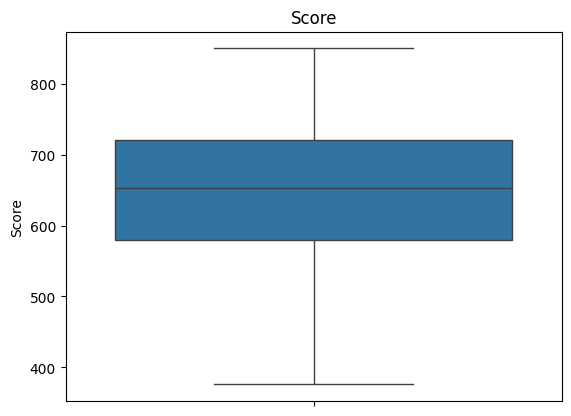

In [ ]:
#Visuzalização em boxplot
srn.boxplot(dataset["Score"]).set_title("Score")

<Axes: xlabel='Score', ylabel='Count'>

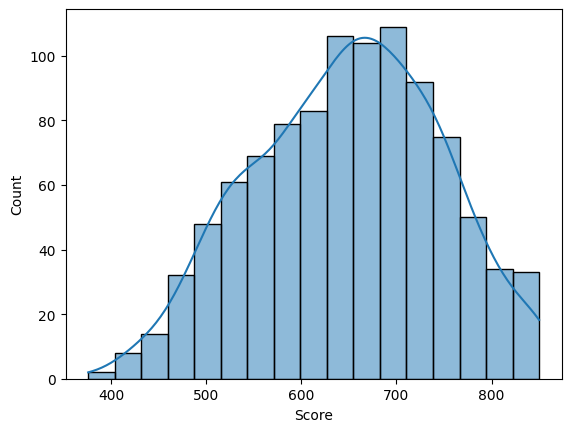

In [ ]:
#Visualização do histograma
srn.histplot(dataset["Score"], kde=True)

In [ ]:
#Idade
dataset["Idade"].describe()

,Idade
count,999.000000
mean,38.902903
std,11.401912
min,-20.000000
25%,32.000000
50%,37.000000
75%,44.000000
max,140.000000


Text(0.5, 1.0, 'Idade')

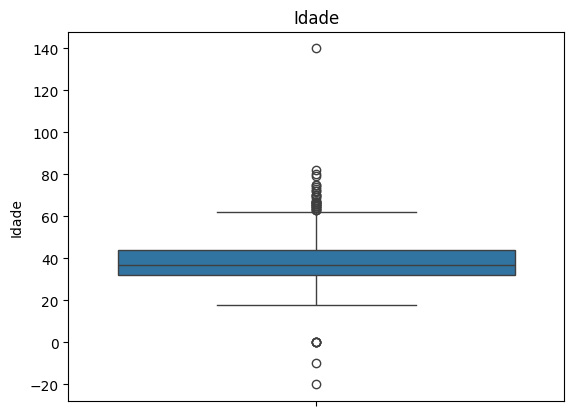

In [ ]:
srn.boxplot(dataset["Idade"]).set_title("Idade")

Text(0.5, 1.0, 'Idade')

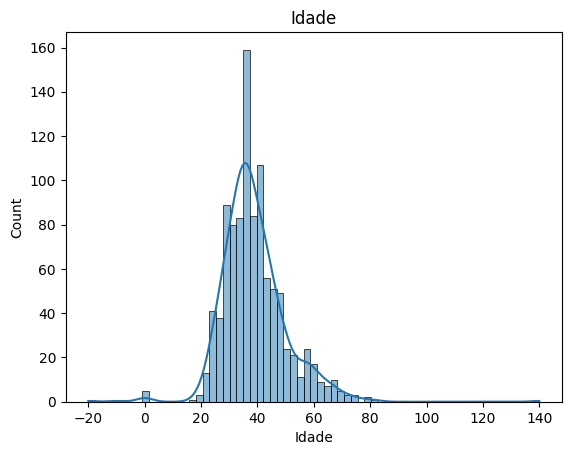

In [ ]:
srn.histplot(dataset["Idade"], kde=True).set_title("Idade")

In [ ]:
#saldo
dataset["Saldo"].describe()

,Saldo
count,9.990000e+02
mean,7.164928e+06
std,6.311840e+06
min,0.000000e+00
25%,0.000000e+00
50%,8.958835e+06
75%,1.258684e+07
max,2.117743e+07


Text(0.5, 1.0, 'Saldo')

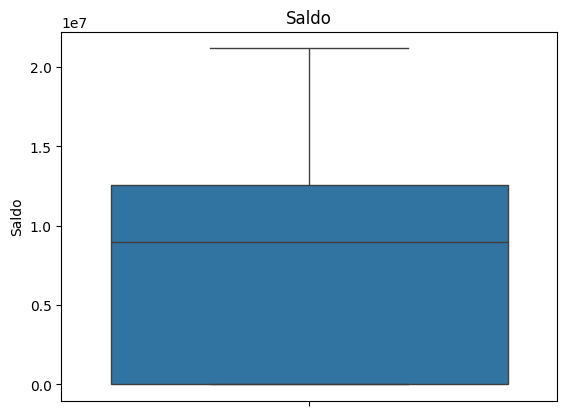

In [ ]:
srn.boxplot(dataset["Saldo"]).set_title("Saldo")

Text(0.5, 1.0, 'Saldo')

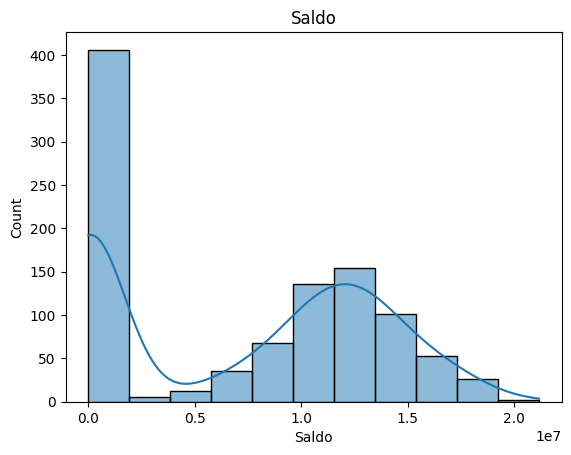

In [ ]:
srn.histplot(dataset["Saldo"], kde=True).set_title("Saldo")

In [ ]:
#Salario
dataset["Salario"].describe()

,Salario
count,9.920000e+02
mean,3.528762e+07
std,5.305800e+08
min,9.677000e+03
25%,3.029011e+06
50%,8.703250e+06
75%,1.405213e+07
max,1.193469e+10


Text(0.5, 1.0, 'Salario')

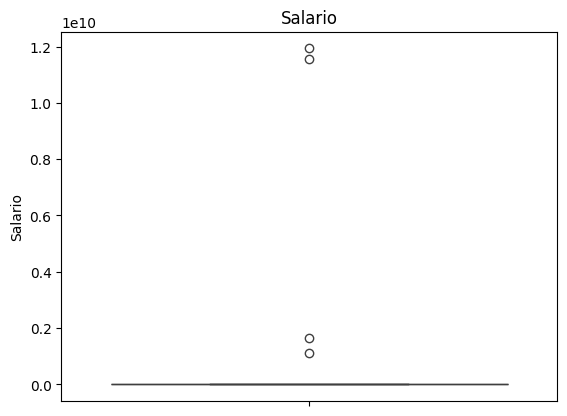

In [ ]:
srn.boxplot(dataset["Salario"]).set_title("Salario")

Text(0.5, 1.0, 'Salario')

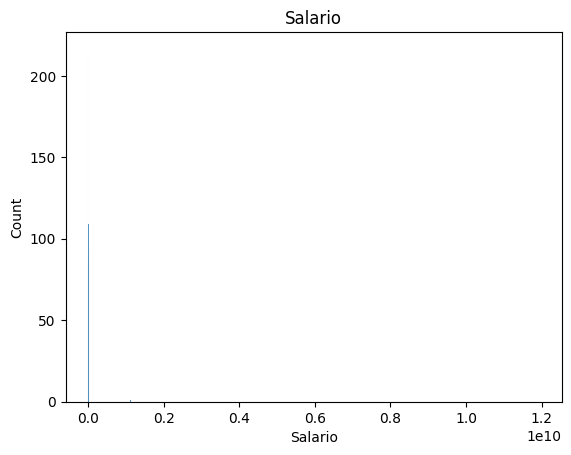

In [ ]:
srn.histplot(dataset["Salario"], kde=False).set_title("Salario")

In [ ]:
#Valores NAN
#Genero e salario
dataset.isnull().sum()

,0
Id,0
Score,0
Estado,0
Genero,8
Idade,0
Patrimonio,0
Saldo,0
Produtos,0
TemCartCredito,0
Ativo,0


In [ ]:
#Salarios
#Remover nas e substituir pela mediana
mediana = sts.median(dataset["Salario"])
mediana

70518.0

In [ ]:
#Substituir NAN por mediana
dataset["Salario"].fillna(mediana, inplace=True)

In [ ]:
#Verificando a substituição
dataset['Salario'].isnull().sum()

0

In [ ]:
#Genero, falta de padronização
agrupado = dataset.groupby(["Genero"]).size()
agrupado

,0
Genero,
F,2
Fem,1
Feminino,461
M,6
Masculino,521


In [ ]:
#Total de NANs
dataset["Genero"].isnull().sum()

8

In [ ]:
#Preencher NAs com Masculino (moda)
dataset["Genero"].fillna("Masculino", inplace=True)

In [ ]:
#Verificando a substituição
dataset['Genero'].isnull().sum()

0

In [ ]:
#Padronização
dataset.loc[dataset["Genero"] == "M", "Genero"] = "Masculino"
dataset.loc[dataset["Genero"].isin(["Fem", "F"]), "Genero"] = "Feminino"
#Visuzalização do resultado
agrupado = dataset.groupby(["Genero"]).size()
agrupado

,0
Genero,
Feminino,464
Masculino,535


In [ ]:
#Idades fora do dominio
dataset['Idade'].describe()

,Idade
count,999.000000
mean,38.902903
std,11.401912
min,-20.000000
25%,32.000000
50%,37.000000
75%,44.000000
max,140.000000


In [ ]:
#Calcular a mediana
mediana = sts.median(dataset["Idade"])
mediana

37

In [ ]:
#Substituir
dataset.loc[(dataset["Idade"] < 0) | (dataset["Idade"] > 120), "Idade"] = mediana

In [ ]:
#Verificando se ainda existem idades fora do dominio
dataset.loc[(dataset["Idade"] < 0) | (dataset["Idade"] > 120) ]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [ ]:
#Dados duplicados coluna ID
dataset[dataset.duplicated(["Id"], keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [ ]:
#Excluir
dataset.drop_duplicates(subset="Id", keep="first", inplace=True)
#Buscando duplicados
dataset[dataset.duplicated(["Id"], keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [ ]:
#Estados fora do domínio
agrupado  = dataset.groupby(["Estado"]).size()
agrupado

,0
Estado,
PR,257
RP,1
RS,477
SC,258
SP,4
TD,1


In [ ]:
#Atribuir a RS (moda)
dataset.loc[dataset["Estado"].isin(["RP", "SP", "TD"]), "Estado"] = "RS"
agrupado = dataset.groupby(["Estado"]).size()
agrupado

,0
Estado,
PR,257
RS,483
SC,258


In [ ]:
#Outliers de salario (Regra de negocio)
desv = sts.stdev(dataset["Salario"])
desv

528988918.4679201

In [ ]:
#Definir padrão como maior que 2 desv
#Checando
dataset.loc[dataset["Salario"] >= 2 * desv]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [ ]:
#Atualizando para a mediana
mediana = sts.median(dataset["Salario"])
mediana

8637195.5

In [ ]:
#Atribuindo
dataset.loc[dataset["Salario"] >= 2 * desv, "Salario"] = mediana

In [ ]:
#Checando se atende o criterio
dataset.loc[dataset["Salario"] >= 2 * desv]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [ ]:
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [ ]:
dataset.shape

(998, 12)